In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.style as stl

In [2]:
max_in = 0
max_out = 0

z01 = 0
z02 = 0
z11 = 0
z12 = 0
z21 = 0
z22 = 0

temp0 = 0
temp1 = 0
temp2 = 0

In [3]:
# -----//-----
a00 = 0.074603
a10 = 0.061205
a20 = 0.055455

a01 = 0.149205
a11 = 0.122410
a21 = 0.110910

a02 = 0.074603
a12 = 0.061205
a22 = 0.055455

In [5]:
# -----//-----
b00 = 1.000000
b10 = 1.000000
b20 = 1.000000

b01 = -1.44883
b11 = -1.18864
b21 = -1.07697

b02 = 0.747238
b12 = 0.433458
b22 = 0.298793

In [6]:
k_period = int(input('k_period: '))
F_in = int(input('F_in: '))
Fd = int(input('Fd: '))

k_period: 5
F_in: 6400
Fd: 67800


In [15]:
w = 2 * math.pi * F_in
w

40212.385965949354

In [8]:
prec = 25
sp_t = []
sp_y_in = []
sp_y_out = []

In [9]:
for i in range(prec * round(k_period * Fd / F_in)):
    t = i / Fd / prec
    y_in = math.sin(w * t)

    sp_t.append(t * 1000)
    sp_y_in.append(y_in)

    if (i % prec) == 0:
        z02 = z01
        z01 = temp0
        temp0 = y_in - b01 * z01 - b02 * z02
        cascade0 = a00 * temp0 + a01 * z01 + a02 * z02

        z12 = z11
        z11 = temp1
        temp1 = cascade0 - b11 * z11 - b12 * z12
        cascade1 = a10 * temp1 + a11 * z11 + a12 * z12

        z22 = z21
        z21 = temp2
        temp2 = cascade1 - b21 * z21 - b22 * z22
        cascade2 = a20 * temp2 + a21 * z21 + a22 * z22

        y_out = cascade2
        sp_y_out.append(y_out)

    else:
        sp_y_out.append(y_out)

    if (max_in <= y_in) and (i > prec * round((k_period - 1) * Fd / F_in)):
        max_in = y_in
    if (max_out <= y_out) and (i > prec * round((k_period - 1) * Fd / F_in)):
        max_out = y_out

In [12]:
dB = (20 * math.log10(max_out / max_in))
dB

-3.2218540157648876

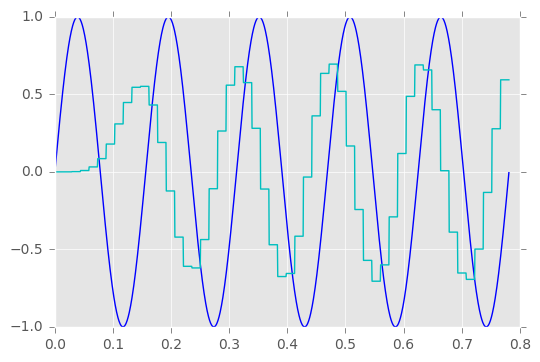

In [14]:
if t <= (k_period / F_in):
    stl.use('ggplot')
    plt.plot(sp_t, sp_y_in, 'b')
    plt.plot(sp_t, sp_y_out, 'c')
    plt.show()